In [1]:
import pandas as pd
import unidecode

In [2]:
def convert_list(lista, tipo):
    retorno = []
    if tipo=='int':
        for item in lista:
            retorno.append(int(item))
    else:
        for item in lista:
            retorno.append(float(item))
    return retorno

In [3]:
url_data_bronze = '../data/bronze'
url_data_prata = '../data/prata'

users_url = [url_data_bronze + '/files/treino/treino_parte1.csv', url_data_bronze + '/files/treino/treino_parte2.csv',
             url_data_bronze + '/files/treino/treino_parte3.csv', url_data_bronze + '/files/treino/treino_parte4.csv',
             url_data_bronze + '/files/treino/treino_parte5.csv', url_data_bronze + '/files/treino/treino_parte6.csv']

In [4]:
df_user = pd.DataFrame({'userId':[], 'userType':[],
                        'historySize':[], 'history':[],
                        'timestampHistory':[], 'numberOfClicksHistory':[],
                        'timeOnPageHistory':[], 'scrollPercentageHistory':[],
                        'pageVisitsCountHistory':[], 'timestampHistory_new':[],       
                     })

for user_url in users_url:
    novos_user = pd.read_csv(user_url)
    df_user = pd.concat([df_user, novos_user])

In [5]:
df_user['history'] = df_user['history'].str.split(',')
df_user['timestampHistory'] = df_user['timestampHistory'].str.split(',')
df_user['numberOfClicksHistory'] = df_user['numberOfClicksHistory'].str.split(',')
df_user['timeOnPageHistory'] = df_user['timeOnPageHistory'].str.split(',')
df_user['scrollPercentageHistory'] = df_user['scrollPercentageHistory'].str.split(',')
df_user['pageVisitsCountHistory'] = df_user['pageVisitsCountHistory'].str.split(',')
df_user['timestampHistory_new'] = df_user['timestampHistory_new'].str.split(',')


In [6]:
df_user['numberOfClicksHistory'] = df_user['numberOfClicksHistory'].apply(lambda x: convert_list(x,'int'))
df_user['timeOnPageHistory'] = df_user['timeOnPageHistory'].apply(lambda x: convert_list(x,'int'))
df_user['scrollPercentageHistory'] = df_user['scrollPercentageHistory'].apply(lambda x: convert_list(x,'float'))
df_user['pageVisitsCountHistory'] = df_user['pageVisitsCountHistory'].apply(lambda x: convert_list(x,'int'))
df_user['scrollPercentageHistory'] = df_user['scrollPercentageHistory'].apply(lambda lst: [np.where(x > 100, 100, x) for x in lst])

In [17]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 577942 entries, 0 to 77941
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   userId                   577942 non-null  object 
 1   userType                 577942 non-null  object 
 2   historySize              577942 non-null  float64
 3   history                  577942 non-null  object 
 4   timestampHistory         577942 non-null  object 
 5   numberOfClicksHistory    577942 non-null  object 
 6   timeOnPageHistory        577942 non-null  object 
 7   scrollPercentageHistory  577942 non-null  object 
 8   pageVisitsCountHistory   577942 non-null  object 
 9   timestampHistory_new     577942 non-null  object 
dtypes: float64(1), object(9)
memory usage: 48.5+ MB


In [21]:
df_user.scrollPercentageHistory

0                                     [50.3, 18.18, 16.46]
1        [25.35, 45.66, 35.3, 28.05, 36.53, 47.57, 55.3...
2        [67.58, 47.22, 41.52, 63.09, 51.38, 65.11, 71....
3        [58.26, 72.66, 22.57, 59.89, 40.36, 36.35, 14....
4                              [78.74, 78.74, 16.71, 9.34]
                               ...                        
77937                                        [46.63, 25.6]
77938                                       [26.22, 50.04]
77939                                         [28.1, 9.83]
77940                                       [40.74, 53.26]
77941                                       [39.45, 61.98]
Name: scrollPercentageHistory, Length: 577942, dtype: object

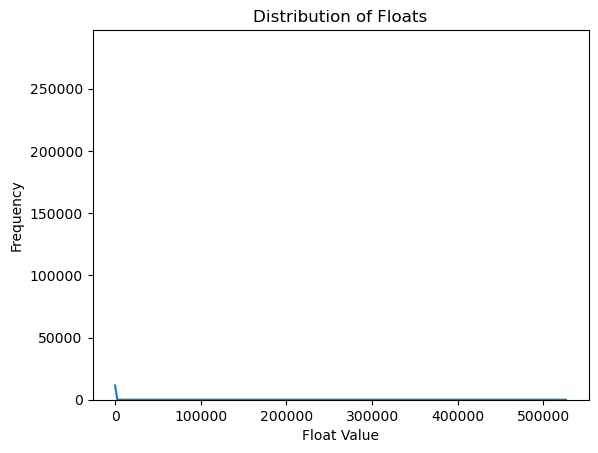

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame with lists of floats

# Flatten the list of floats into one list
all_floats = [item for sublist in df_user['scrollPercentageHistory'] for item in sublist]


# Create a distribution plot
sns.histplot(all_floats, kde=True)  # kde=True adds a kernel density estimate
plt.title('Distribution of Floats')
plt.xlabel('Float Value')
plt.ylabel('Frequency')
plt.show()


In [25]:
import numpy as np

# Sample list of floatsfloat_list = [1.2, 2.3, 3.4, 4.5, 5.6, 6.7, 7.8, 8.9, 9.0]

# Calculate statistics
minimum = np.min(all_floats)
q1 = np.percentile(all_floats, 25)  # First quartile (Q1)
q2 = np.percentile(all_floats, 50)  # Second quartile (Q2) / Median
q3 = np.percentile(all_floats, 75)  # Third quartile (Q3)
mean = np.mean(all_floats)
maximum = np.max(all_floats)

# Print results
print(f"Minimum: {minimum}")
print(f"Q1 (25th percentile): {q1}")
print(f"Q2 (Median / 50th percentile): {q2}")
print(f"Q3 (75th percentile): {q3}")
print(f"Mean: {mean}")
print(f"Maximum: {maximum}")


Minimum: 0.02
Q1 (25th percentile): 27.08
Q2 (Median / 50th percentile): 43.23
Q3 (75th percentile): 59.93
Mean: 54.00550790618996
Maximum: 526275.56


In [47]:
all_floats

[array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array(100.),
 array

In [41]:
df_user['scrollPercentageHistory'] = df_user['scrollPercentageHistory'].apply(lambda lst: [np.where(x > 100, 100, x) for x in lst])

In [65]:
visits = [item for sublist in df_user['pageVisitsCountHistory'] for item in sublist]

In [69]:
visits.sort(reverse=True)

In [71]:
visits

[654,
 593,
 331,
 278,
 271,
 251,
 242,
 218,
 212,
 211,
 210,
 209,
 206,
 200,
 195,
 193,
 193,
 193,
 193,
 187,
 183,
 182,
 176,
 175,
 169,
 167,
 166,
 164,
 164,
 164,
 160,
 159,
 158,
 157,
 154,
 153,
 151,
 149,
 149,
 147,
 146,
 145,
 144,
 144,
 143,
 140,
 136,
 136,
 136,
 133,
 132,
 130,
 130,
 130,
 129,
 127,
 125,
 125,
 125,
 122,
 122,
 122,
 119,
 119,
 118,
 114,
 114,
 114,
 114,
 113,
 113,
 111,
 111,
 110,
 109,
 109,
 109,
 108,
 108,
 107,
 107,
 107,
 106,
 105,
 105,
 105,
 103,
 103,
 103,
 103,
 103,
 102,
 102,
 100,
 100,
 99,
 99,
 99,
 98,
 98,
 98,
 98,
 97,
 95,
 95,
 94,
 94,
 94,
 94,
 93,
 93,
 93,
 93,
 93,
 92,
 92,
 92,
 92,
 92,
 91,
 91,
 91,
 91,
 91,
 90,
 90,
 90,
 90,
 90,
 90,
 90,
 89,
 88,
 88,
 87,
 87,
 87,
 87,
 87,
 87,
 86,
 86,
 86,
 86,
 84,
 84,
 84,
 84,
 83,
 83,
 83,
 83,
 82,
 82,
 82,
 82,
 82,
 82,
 82,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 80,
 80,
 80,
 80,
 80,
 79,
 79,
 79,
 79,
 79,
 78,
 78,
 78,
 78,
 77,


In [73]:
df_user

,userId,userType,historySize,history,timestampHistory,numberOfClicksHistory,timeOnPageHistory,scrollPercentageHistory,pageVisitsCountHistory,timestampHistory_new
0,f98d1132f60d46883ce49583257104d15ce723b3bbda21...,Non-Logged,3.0,"[c8aab885-433d-4e46-8066-479f40ba7fb2, 68d203...","[1657146417045, 1657146605778, 1657146698738]","[76, 38, 41]","[20380, 21184, 35438]","[50.3, 18.18, 16.46]","[2, 1, 1]","[1657146417045, 1657146605778, 1657146698738]"
1,2c1080975e257ed630e26679edbe4d5c850c65f3e09f65...,Non-Logged,60.0,"[3325b5a1-979a-4cb3-82b6-63905c9edbe8, fe8560...","[1656684240278, 1656761266729, 1656761528085...","[7, 80, 2, 1, 7, 62, 26, 44, 4, 4, 14, 45, 13,...","[6049, 210489, 8672, 10000, 30000, 123007, 996...","[25.35, 45.66, 35.3, 28.05, 36.53, 47.57, 55.3...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, ...","[1656684240278, 1656761266729, 1656761528085..."
2,0adffd7450d3b9840d8c6215f0569ad942e782fb19b805...,Logged,107.0,"[04756569-593e-4133-a95a-83d35d43dbbd, 29b6b1...","[1656678946256, 1656701076495, 1656701882565...","[0, 0, 0, 0, 0, 44, 0, 0, 2, 1, 0, 0, 0, 44, 0...","[311274, 140000, 32515, 157018, 118689, 159243...","[67.58, 47.22, 41.52, 63.09, 51.38, 65.11, 71....","[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, ...","[1656678946256, 1656701076495, 1656701882565..."
3,c1e8d644329a78ea1f994292db624c57980b2886cfbc2d...,Non-Logged,56.0,"[1f2b9c2f-a2d2-4192-b009-09065da8ec23, 047565...","[1658333312180, 1658404553818, 1658408449062...","[8, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, ...","[182696, 91925, 30000, 273655, 126409, 42980, ...","[58.26, 72.66, 22.57, 59.89, 40.36, 36.35, 14....","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1658333312180, 1658404553818, 1658408449062..."
4,e777d1f31d4d955b63d60acc13df336d3903f52ab8f8f4...,Non-Logged,4.0,"[bebdeb3e-1699-43e0-a1b8-989f5a6ab679, f4b484...","[1658766608801, 1658766608801, 1660084035094...","[579, 579, 7, 2]","[801396, 801396, 10000, 10000]","[78.74, 78.74, 16.71, 9.34]","[7, 7, 1, 1]","[1658766608801, 1658766608801, 1660084035094..."
...,...,...,...,...,...,...,...,...,...,...
77937,1f127d1d22eb98869642ce218998265e00e48a437c1afc...,Non-Logged,2.0,"[7cfb21ba-5e3a-45ab-a0d8-d2d4baaf8823, d9f5db...","[1657326235808, 1660067897448]","[7, 12]","[47320, 19387]","[46.63, 25.6]","[2, 1]","[1657326235808, 1660067897448]"
77938,d7ad044fbee204ef63755977cf4da82ed26d1e15b678e5...,Non-Logged,2.0,"[83e8814f-7de7-4cd9-b616-327008b86f0a, a36c98...","[1659884923835, 1660163481828]","[29, 10]","[40358, 10000]","[26.22, 50.04]","[2, 1]","[1659884923835, 1660163481828]"
77939,8c53774379c974721e8108133058e9f99d9d96b6ddefe6...,Non-Logged,2.0,"[93d31414-9969-4bc0-b721-6f73b603f023, 9e792f...","[1659482565430, 1659484173830]","[39, 0]","[430000, 10000]","[28.1, 9.83]","[2, 1]","[1659482565430, 1659484173830]"
77940,8bb2e391615bc319e30d769c4d809193662c870cf18f18...,Non-Logged,2.0,"[3230374d-3227-480f-8aad-be40e7918a89, 215e0e...","[1659762125465, 1659764560346]","[2, 1]","[169658, 183309]","[40.74, 53.26]","[2, 1]","[1659762125465, 1659764560346]"


In [83]:
new_df = df_user.loc[:, ['userId', 'history', 'scrollPercentageHistory', 'pageVisitsCountHistory', 'timeOnPageHistory']]

In [101]:
%%time
new_df = new_df.explode(['history', 'scrollPercentageHistory', 'pageVisitsCountHistory', 'timeOnPageHistory'], ignore_index=True)

CPU times: total: 2.75 s
Wall time: 2.76 s


In [103]:
len(new_df)

8123951

In [105]:
new_df.head()

,userId,history,scrollPercentageHistory,pageVisitsCountHistory,timeOnPageHistory
0,f98d1132f60d46883ce49583257104d15ce723b3bbda21...,c8aab885-433d-4e46-8066-479f40ba7fb2,50.3,2,20380
1,f98d1132f60d46883ce49583257104d15ce723b3bbda21...,68d2039c-c9aa-456c-ac33-9b2e8677fba7,18.18,1,21184
2,f98d1132f60d46883ce49583257104d15ce723b3bbda21...,13e423ce-1d69-4c78-bc18-e8c8f7271964,16.46,1,35438
3,2c1080975e257ed630e26679edbe4d5c850c65f3e09f65...,3325b5a1-979a-4cb3-82b6-63905c9edbe8,25.35,1,6049
4,2c1080975e257ed630e26679edbe4d5c850c65f3e09f65...,fe856057-f97d-419f-ab1c-97c5c3e0719c,45.66,1,210489


In [111]:
df_user.userType.value_counts(normalize=True)

userType
Non-Logged    0.793948
Logged        0.206052
Name: proportion, dtype: float64

In [117]:
df_user.userId.value_counts().max()

1